<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks-for-Ideas/blob/main/Cryogenic_MTJs_Current_Densities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

{'Mo‑based pMTJ intrinsic J0 (A/cm^2)': 2800000.0,
 'Mo‑based pMTJ intrinsic J0 (A/m^2)': 28000000000.0,
 'Rehm 4 K J (A/m^2)': 121999999999.99998,
 'Rehm 4 K J (A/cm^2)': 12199999.999999998,
 'Lang 9 K J lower‑bound (A/m^2)': 174880167778.54178,
 'Lang 9 K J lower‑bound (A/cm^2)': 17488016.777854178}

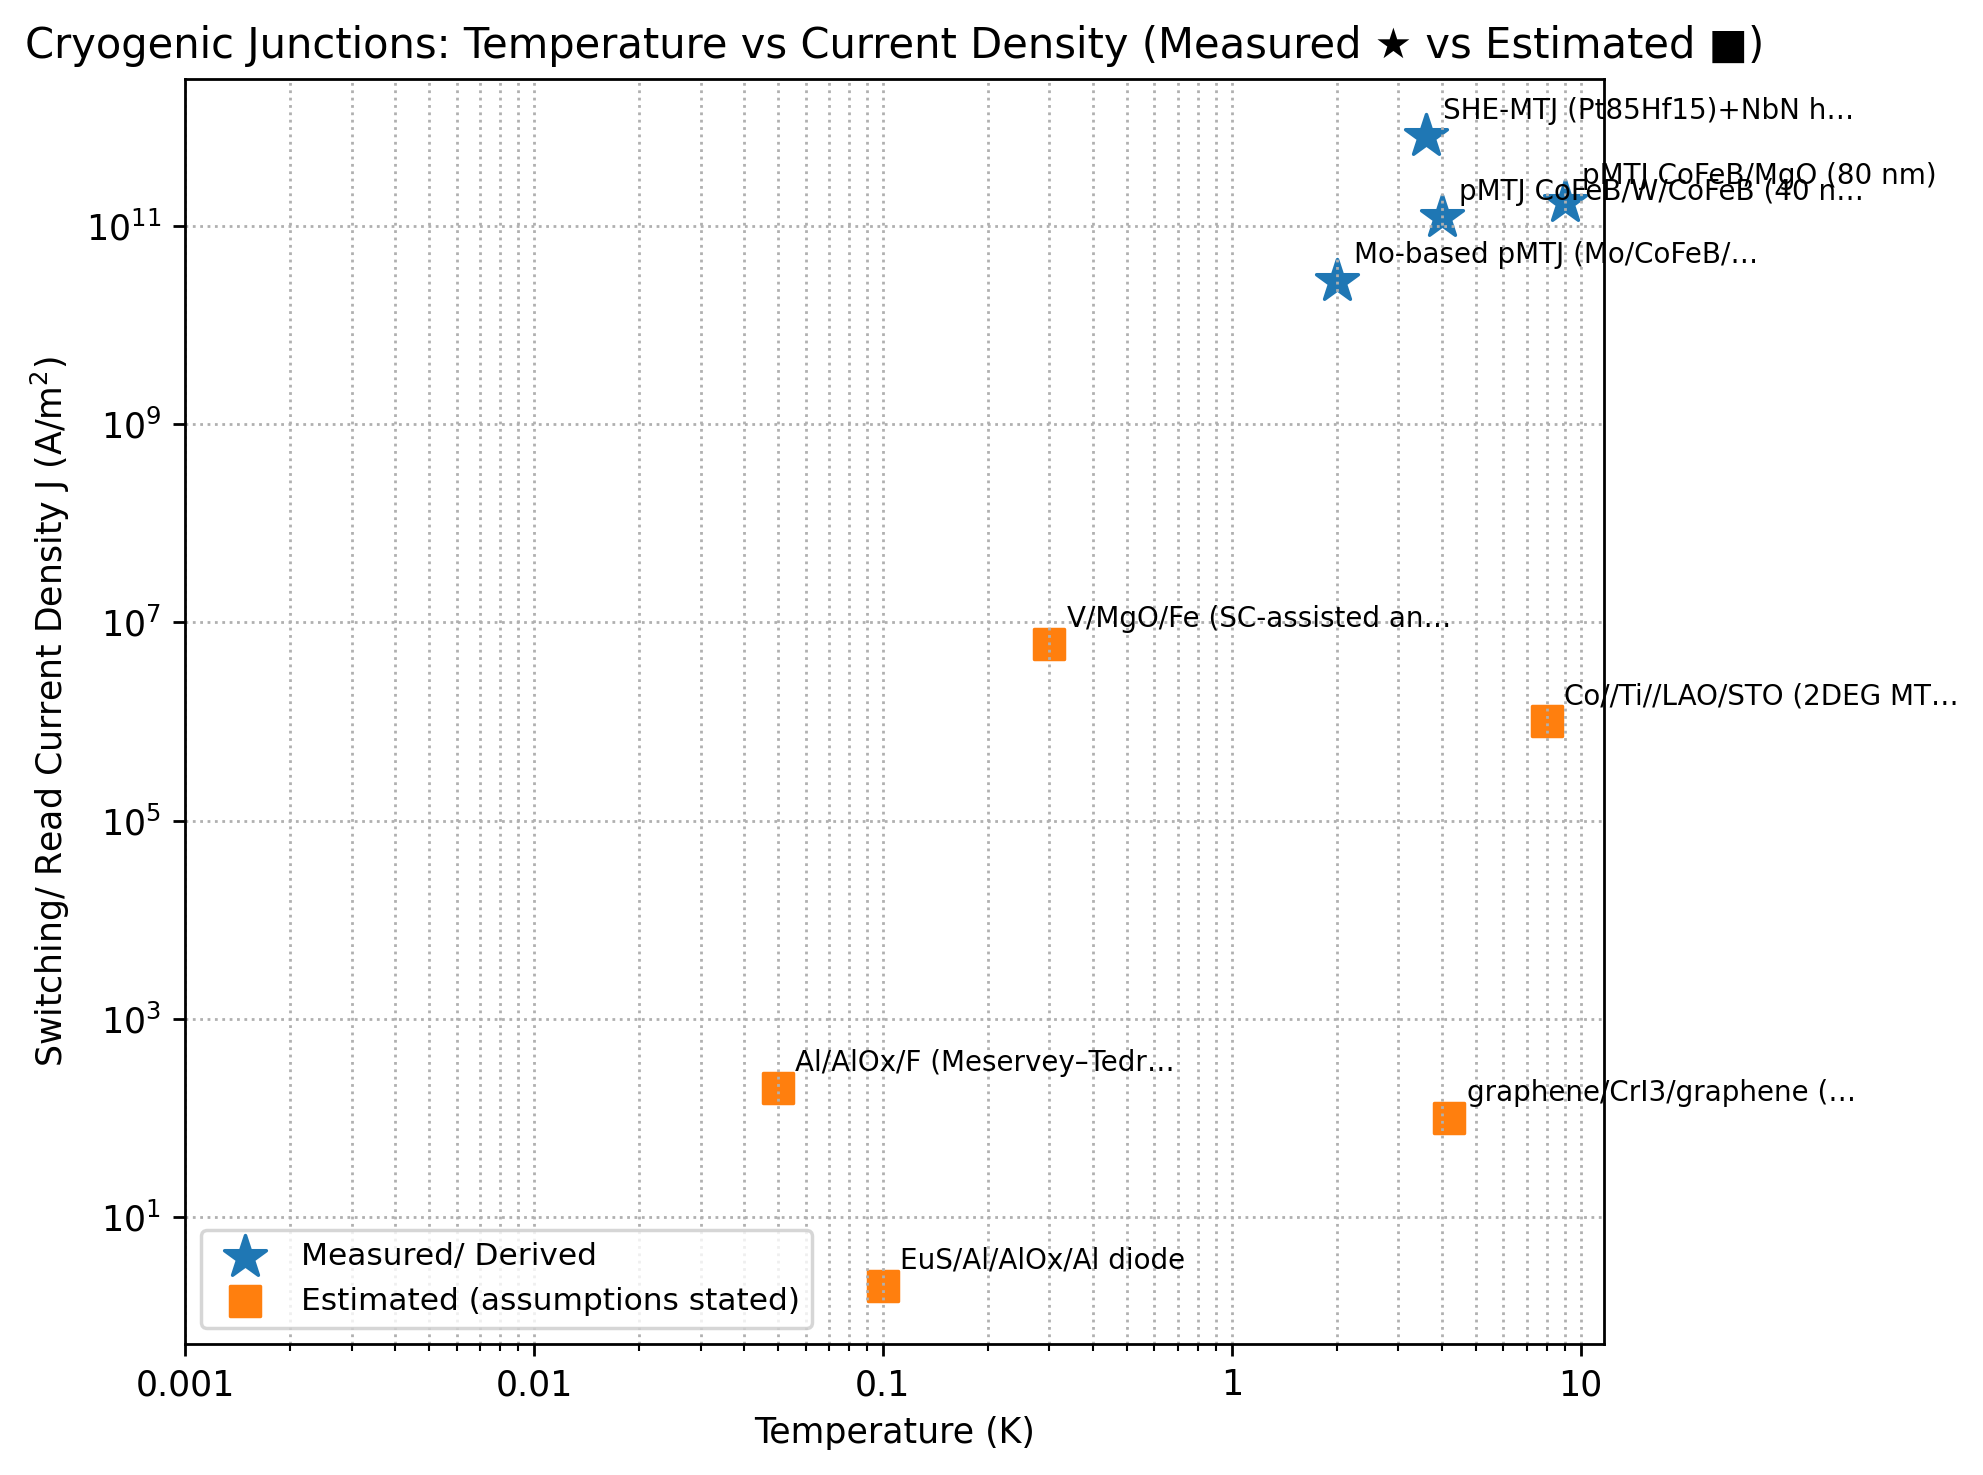

In [3]:
# Classify measured vs estimated,
# set Mo‑based pMTJ intrinsic J0 = 2.8e6 A/cm^2 (→ 2.8e10 A/m^2), for reference,
# and render a log–log scatter with star markers for measured and square markers for estimated.
# Also ensure x‑axis tick labels use decimal notation (e.g., 0.001, 0.01, 0.1, 1, 10).

import math
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 250

# --- Helper conversions ---
CM2_TO_M2 = 1e-4  # 1 cm^2 = 1e-4 m^2
def A_per_cm2_to_A_per_m2(j_acm2: float) -> float:
    return j_acm2 / CM2_TO_M2  # multiply by 1e4

# Helper for circular area (not needed now, kept for consistency)
def circle_area_from_diameter(d_m: float) -> float:
    return math.pi * (d_m/2.0)**2

# --- Verified/derived quantities from cited works ---
# Rehm et al. (4 K): Vc0 ≈ 0.366 V, RA ≈ 3 Ω·µm² → J = V/RA
RA_pmtj_ohm_m2 = 3.0e-12  # 3 Ω·µm²
Vc0_4K_V = 0.366
J_rehm_Am2 = Vc0_4K_V / RA_pmtj_ohm_m2  # ≈ 1.22e11 A/m^2
J_rehm_Acm2 = J_rehm_Am2 * CM2_TO_M2  # for display

# Lang et al. (9 K, 80 nm): use V ≈ 2.0 V and R_AP ≈ 3.16×720 Ω (lower‑bound I), area from 80 nm diameter
d80_m = 80e-9
area80_m2 = circle_area_from_diameter(d80_m)
RP_ohm = 720.0
RAP_over_RP = 3.16
R_AP = RP_ohm * RAP_over_RP
I_thr_A = 2.0 / R_AP
J_lang_Am2 = I_thr_A / area80_m2
J_lang_Acm2 = J_lang_Am2 * CM2_TO_M2

# Nguyen et al. (SHE‑MTJ + NbN hTron, 4 K): reported write J ~ 8e11 A/m^2
J_nguyen_Am2 = 8.0e11
J_nguyen_Acm2 = J_nguyen_Am2 * CM2_TO_M2

# Mo‑based pMTJ intrinsic J0: given/verified as 2.8e6 A/cm^2 → 2.8e10 A/m^2
J_mo_Acm2 = 2.8e6
J_mo_Am2 = A_per_cm2_to_A_per_m2(J_mo_Acm2)

# Estimated read‑mode current densities for non‑switching/aux devices (clearly labeled as estimates):
# Choose consistent assumptions as before.
V_read_200uV = 200e-6
# Meservey–Tedrow planar Al/AlOx/F (mK–K): RA ≈ 1e6 Ω·µm² (assumed)
RA_meservey = 1e6 * 1e-12
J_meservey_Am2 = V_read_200uV / RA_meservey
# EuS/Al/AlOx/Al diode (100 mK): thicker oxide, RA ≈ 1e8 Ω·µm² (assumed)
RA_eus = 1e8 * 1e-12
J_eus_Am2 = V_read_200uV / RA_eus
# vdW graphene/CrI3/graphene: assume RA ≈ 1e9 Ω·µm² and 100 mV read bias
RA_cri3 = 1e9 * 1e-12
J_cri3_Am2 = 0.1 / RA_cri3
# V/MgO/Fe superconductivity‑assisted anisotropy: assume RA ≈ 1e5 Ω·µm² and 0.6 V bias
RA_vmgofe = 1e5 * 1e-12
J_vmgofe_Am2 = 0.6 / RA_vmgofe
# Co//Ti//LAO/STO (< 10 K): assume RA ≈ 1e4 Ω·µm² and 10 mV
RA_lao = 1e4 * 1e-12
J_lao_Am2 = 0.01 / RA_lao

# Build full 9‑row dataset
rows = [
    # Measured/derived
    {"Variation": "pMTJ CoFeB/W/CoFeB (40 nm)", "T_lowest_K": 4.0,  "Mode": "STT",                    "Contains_SC": "No",  "J_Am2": J_rehm_Am2,  "Measured?": True,  "Method": "Computed from RA=3 Ω·µm² and Vc0=0.366 V (Rehm et al.)"},
    {"Variation": "pMTJ CoFeB/MgO (80 nm)",      "T_lowest_K": 9.0,  "Mode": "STT (2 ns pulse)",     "Contains_SC": "No",  "J_Am2": J_lang_Am2,  "Measured?": True,  "Method": "Estimated lower‑bound using V≈2.0 V and R_AP=3.16×720 Ω (Lang et al.)"},
    {"Variation": "SHE‑MTJ (Pt85Hf15)+NbN hTron","T_lowest_K": 3.6,  "Mode": "SOT (3‑terminal)",     "Contains_SC": "Yes", "J_Am2": J_nguyen_Am2,"Measured?": True,  "Method": "Reported write J≈8×10^11 A/m² (Nguyen et al.)"},
    {"Variation": "Mo‑based pMTJ (Mo/CoFeB/MgO)","T_lowest_K": 2.0,  "Mode": "STT",                   "Contains_SC": "No",  "J_Am2": J_mo_Am2,    "Measured?": True,  "Method": "Intrinsic J0 reported ≈ 2.8×10^6 A/cm² (converted)"},
    # Estimated read‑mode / non‑STT/SOT values
    {"Variation": "V/MgO/Fe (SC‑assisted anisotropy)","T_lowest_K": 0.3, "Mode": "MR/aniso (read)", "Contains_SC": "Yes", "J_Am2": J_vmgofe_Am2,"Measured?": False, "Method": "Estimated read J at 0.6 V using assumed RA≈1e5 Ω·µm²"},
    {"Variation": "Al/AlOx/F (Meservey–Tedrow)", "T_lowest_K": 0.05, "Mode": "Spin‑pol. tunneling",  "Contains_SC": "Yes", "J_Am2": J_meservey_Am2,"Measured?": False,"Method": "Estimated read J at 200 µV using assumed RA≈1e6 Ω·µm²"},
    {"Variation": "EuS/Al/AlOx/Al diode",        "T_lowest_K": 0.1,  "Mode": "SC spintronic diode",  "Contains_SC": "Yes", "J_Am2": J_eus_Am2,    "Measured?": False, "Method": "Estimated read J at 200 µV using assumed RA≈1e8 Ω·µm²"},
    {"Variation": "graphene/CrI3/graphene (vdW)","T_lowest_K": 4.2,  "Mode": "Spin‑filter MR (read)","Contains_SC": "No",  "J_Am2": J_cri3_Am2,   "Measured?": False, "Method": "Estimated read J at 100 mV with RA≈1e9 Ω·µm²"},
    {"Variation": "Co//Ti//LAO/STO (2DEG MTJ)",  "T_lowest_K": 8.0,  "Mode": "MR (read)",            "Contains_SC": "No",  "J_Am2": J_lao_Am2,    "Measured?": False, "Method": "Estimated read J at 10 mV using assumed RA≈1e4 Ω·µm²"},
]

df = pd.DataFrame(rows)

# Save dataset for download
csv_path = "/content/cryogenic_mtj_current_density_all9.csv"
df.to_csv(csv_path, index=False)

# Prepare scatter: separate measured vs estimated
df_meas = df[df["Measured?"] == True]
df_est  = df[df["Measured?"] == False]

# Render plot: log–log, with Temperature starting from 1 mK
plt.figure(figsize=(8,6))

# Measured = stars, Estimated = squares; no explicit colors
plt.scatter(df_meas["T_lowest_K"], df_meas["J_Am2"], marker="*", s=160, label="Measured/ Derived")
plt.scatter(df_est["T_lowest_K"],  df_est["J_Am2"],  marker="s", s=70,  label="Estimated (assumptions stated)")

# Annotate each point with a compact label
for _, r in df.iterrows():
    label = r["Variation"][:24] + ("…" if len(r["Variation"])>24 else "")
    plt.annotate(label, (r["T_lowest_K"], r["J_Am2"]), textcoords="offset points", xytext=(5,5), fontsize=8)

# Axes scaling
plt.xscale("log")
plt.yscale("log")

# Decimal tick labels on x‑axis (avoid 10^n notation)
from matplotlib.ticker import FixedLocator, FixedFormatter
xticks = [1e-3, 1e-2, 1e-1, 1e0, 1e1]
xlabels = ["0.001", "0.01", "0.1", "1", "10"]
plt.gca().xaxis.set_major_locator(FixedLocator(xticks))
plt.gca().xaxis.set_major_formatter(FixedFormatter(xlabels))

plt.xlim(left=1e-3)  # start at 0.001 K
plt.xlabel("Temperature (K)")
plt.ylabel("Switching/ Read Current Density J (A/m$^2$)")
plt.title("Cryogenic Junctions: Temperature vs Current Density (Measured ★ vs Estimated ■)")
plt.grid(True, which="both", linestyle=":")
plt.legend(loc="lower left", fontsize=9)
plt.tight_layout()

img_path = "/content/cryogenic_mtj_scatter_measured_vs_estimated.png"
plt.savefig(img_path, dpi=250)

# Provide a quick verification printout for key conversions
verification = {
    "Mo‑based pMTJ intrinsic J0 (A/cm^2)": J_mo_Acm2,
    "Mo‑based pMTJ intrinsic J0 (A/m^2)": J_mo_Am2,
    "Rehm 4 K J (A/m^2)": J_rehm_Am2,
    "Rehm 4 K J (A/cm^2)": J_rehm_Acm2,
    "Lang 9 K J lower‑bound (A/m^2)": J_lang_Am2,
    "Lang 9 K J lower‑bound (A/cm^2)": J_lang_Acm2,
}
verification